# Eigenvalues and eigenvectors

When working with complex engineering problems, it is often possible (at least, desirable) to simplify the scenario into a fundamental set of modes and frequencies, e.g., structural analysis. 
This is the purpose of **eigenvectors and eigenvalues**, respectively, and being able to calculate them will prove useful for you in a variety of situations.

## Summary of commands

In this exercise, we will demonstrate the following:
- [`np.linalg.eig(A)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) - Returns eigenvalues and eigenvectors of matrix `A`.
    - The eigenvalues are returned in a 1D aray.
    - The eigenvectors are returned in a matrix, where the $i$th column vector corresponds to the $i$th eigenvalue.

## Demo

![mass spring](../assets/fig/4_mass-spring.png)

Two blocks of mass $m$ are placed in between three springs with constant $k$.
A system of equations can be set up such that 

$$ \begin{align}
m \ddot{x}_1 &= -2k x_1 + kx_2 \\
m \ddot{x}_2 &= k x_1 - 2kx_2
\end{align} $$ 

If $k=1$ and $m=1$ and an initial displacement of the blocks are $x_1=0.1$ and $x_2=-0.3$, find the equation of the position of the block as a function of time.
Plot the displacement of the blocks as a function of time with $dt=0.1$ for the first twenty seconds.
Draw a picture of the mode shapes of the blocks.

```{note}
The negative sign means that the block is displaced to the left.
```

The eigenvalues are:
[-1. -3.]

The eigenvectors are:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


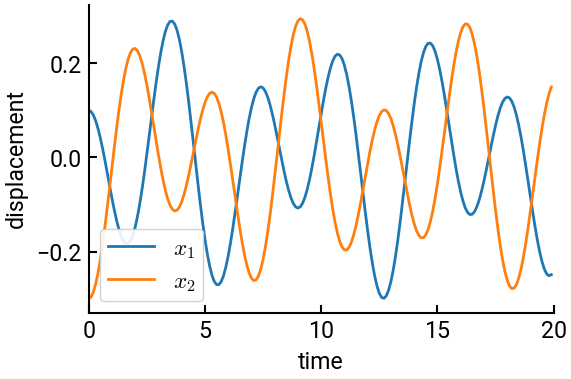

In [12]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# initialize constants and matrix
m = 1
k = 1
A = np.array([[-2*k/m, k/m], [k/m, -2*k/m]])

# compute eigenvectors and eigenvalues - read carefully
D, V = np.linalg.eig(A)
x0 = np.array([[0.1], [-0.3]])
C = np.linalg.inv(V) @ x0
print(f"The eigenvalues are:\n{D}\n")
print(f"The eigenvectors are:\n{V}")

# calculate motion of the blocks - read carefully
t = np.arange(0, 20, 0.1)
W = np.sqrt(-D)
x = C[0, 0] * V[:, 0, None] * np.cos(W[0] * t) + \
    C[1, 0] * V[:, 1, None] * np.cos(W[1] * t)

# make the plot
fig, ax = plt.subplots()
ax.plot(t, x[0,:], lw=2, label='$x_1$')
ax.plot(t, x[1,:], lw=2, label='$x_2$')
ax.set(xlabel='time', ylabel='displacement', xlim=[0,20])
ax.legend(framealpha=0.9)
plt.show()

![mass spring modes](../assets/fig/4_mass-spring-modes.png)

```{tip}
While the calculations in this example are straightforward, there are some stylistic aspects that are worth explaining:
- The two `print()` statements have `f"...{}..."`.
  That is special syntax for **f-strings**, or [formatted string literals](https://www.pythontutorial.net/python-basics/python-f-strings/), one of the coolest features of Python.
  It is like a regular string, but everything inside the curly braces `{}` is evaluated on-the-fly, allowing you to insert variables and even functions dynamically into strings.
  Here we insert the arrays and also include `\n` special characters for line breaks.
- In the labels for the legend, we included special LaTeX formatting to get the math text to render more properly. 
  LaTeX is not an emphasis of this course, but if you are planning to do more technical writing in the future (as many of you will...), it is a very good skill to learn!
- Also note that we had to use a small hack to enforce the column vector `V[:, 0, None]` to have shape `(3,1)` instead of `(3,)`.
  This allows the broadcasting to execute successfully, and is admittedly one of the areas where Python is more confusing than MATLAB (which assigns vectors 2 dimensions, `n × 1`).
```